[[ 1.        +0.j         -0.80901699-0.58778525j  0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          1.        +0.j         -0.80901699-0.58778525j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          1.        +0.j
  -0.80901699-0.58778525j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   1.        +0.j         -0.80901699-0.58778525j  0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j         

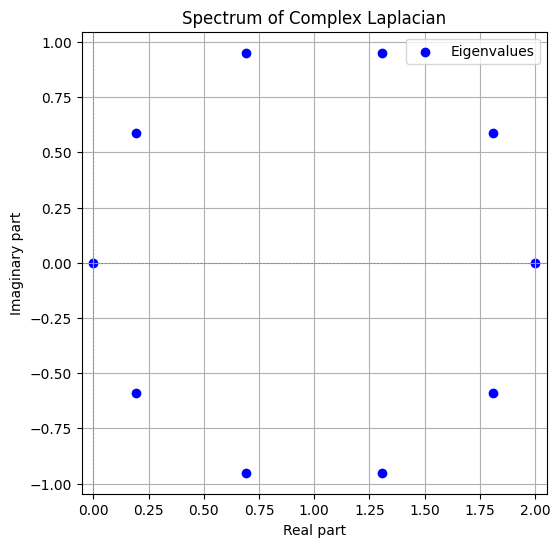

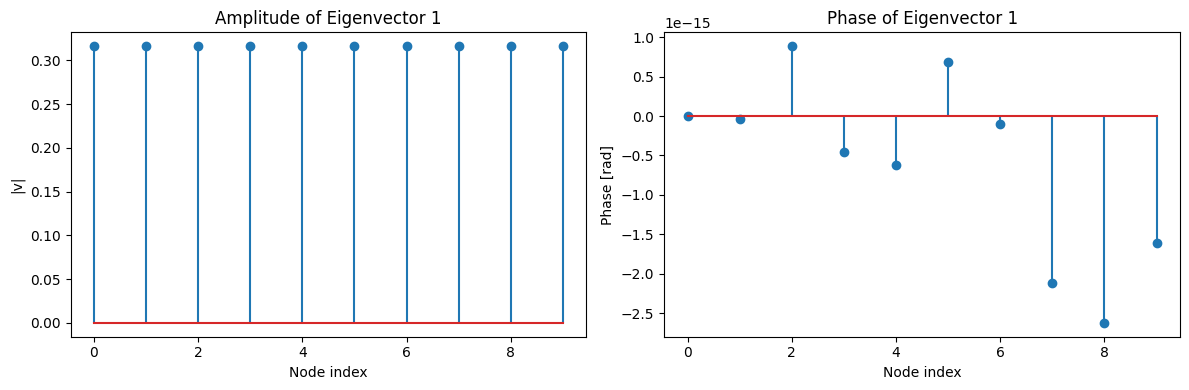

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# === パラメータ設定 ===
n = 10                     # ノード数
theta = 2 * np.pi / n      # 各エッジの位相（方向性を複素位相で表現）
w = np.exp(1j * theta)     # エッジの複素重み（単位振幅・方向あり）

# === 隣接行列（複素数）を作成（有向円環グラフ） ===
A = np.zeros((n, n), dtype=complex)
for i in range(n):
    A[i, (i+1)%n] = w  # ノードiからi+1へ向かう複素エッジ
    

# === ラプラス行列の作成 ===
D = np.diag(np.sum(np.abs(A), axis=1))  # 各ノードの出次数（絶対値和）
L = D - A                                # 複素ラプラス行列
print(L)

# === 固有値・固有ベクトルの計算 ===
eigvals, eigvecs = np.linalg.eig(L)

# === 固有値のプロット（複素平面上） ===
plt.figure(figsize=(6, 6))
plt.scatter(eigvals.real, eigvals.imag, c='blue', label='Eigenvalues')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.title("Spectrum of Complex Laplacian")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# === 任意の固有ベクトルの可視化（振幅と位相） ===
k = 1  # モード番号（例: 1番目の固有ベクトル）
v = eigvecs[:, k]

plt.figure(figsize=(12, 4))

# 振幅プロット
plt.subplot(1, 2, 1)
plt.stem(np.abs(v))
plt.title("Amplitude of Eigenvector {}".format(k))
plt.xlabel("Node index")
plt.ylabel("|v|")

# 位相プロット
plt.subplot(1, 2, 2)
plt.stem(np.angle(v))
plt.title("Phase of Eigenvector {}".format(k))
plt.xlabel("Node index")
plt.ylabel("Phase [rad]")

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from scipy.linalg import eigh, block_diag
import matplotlib.pyplot as plt
import networkx as nx

# 粒子の数と次元
n_particles = 4
dim = 3

# 粒子の位置（仮の配置：正方形の各頂点に）
positions = np.array([
    [0.0, 0.0, 0.0],  # 粒子0
    [1.0, 0.0, 0.0],  # 粒子1
    [1.0, 1.0, 0.0],  # 粒子2
    [0.0, 1.0, 0.0],  # 粒子3
])

# 接触関係（無向エッジ：接触している粒子のペア）
edges = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),
    (0, 2),  # 対角線を加える
]

# 各エッジのばね定数（すべて1に設定）
k = 1.0

# 空の nd x nd テンソルラプラシアン
nd = n_particles * dim
L = np.zeros((nd, nd))

# ラプラシアンの構築
for i, j in edges:
    xi, xj = positions[i], positions[j]
    dij = xj - xi
    norm = np.linalg.norm(dij)
    if norm == 0:
        continue
    n_ij = dij / norm
    kij_mat = k * np.outer(n_ij, n_ij)

    # 各ブロックの位置を計算
    i_idx = slice(i*dim, (i+1)*dim)
    j_idx = slice(j*dim, (j+1)*dim)

    # ブロック行列に加算（対称）
    L[i_idx, i_idx] += kij_mat
    L[j_idx, j_idx] += kij_mat
    L[i_idx, j_idx] -= kij_mat
    L[j_idx, i_idx] -= kij_mat

# 固有値・固有ベクトル
eigvals, eigvecs = eigh(L)

print(L)

[[ 1.5  0.5  0.  -1.   0.   0.  -0.5 -0.5  0.   0.   0.   0. ]
 [ 0.5  1.5  0.   0.   0.   0.  -0.5 -0.5  0.   0.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.  -1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5 -0.5  0.   0.   0.   0.   1.5  0.5  0.  -1.   0.   0. ]
 [-0.5 -0.5  0.   0.  -1.   0.   0.5  1.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   0.   0.   1.   0.   0. ]
 [ 0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]
